In [19]:
STATION_PATH = 'Train/Train/station_201_deploy.csv'

In [20]:
from data_handling import *
station_data = load_data(STATION_PATH)

The time conversion is  possible way of extracting seasonal/monthly features - not implemented yet.

In [140]:
from datetime import datetime
ts = int(station_data.loc[0][4])

# if you encounter a "year is out of range" error the timestamp
# may be in milliseconds, try `ts /= 1000` in that case
print('Unix Timestamp:',int(station_data.loc[0][4]))
print('Timestamp conversion:', datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))

Unix Timestamp: 1412114400
Timestamp conversion: 2014-09-30 22:00:00


The below cells represent very basic analysis - just an initial glance at the data.

In [ ]:
station_data.head()

In [ ]:
station_data.tail()

In [160]:
station_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745 entries, 0 to 744
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   station                      745 non-null    int64  
 1   latitude                     745 non-null    float64
 2   longitude                    745 non-null    float64
 3   numDocks                     745 non-null    int64  
 4   timestamp                    745 non-null    float64
 5   year                         745 non-null    int64  
 6   month                        745 non-null    int64  
 7   day                          745 non-null    int64  
 8   hour                         745 non-null    int64  
 9   weekday                      745 non-null    object 
 10  weekhour                     745 non-null    int64  
 11  isHoliday                    745 non-null    int64  
 12  windMaxSpeed.m.s             744 non-null    float64
 13  windMeanSpeed.m.s   

___
**RUNNING TODO: Take care of the null values**
___


In [ ]:
(station_data['station'].value_counts(),
station_data['longitude'].value_counts(),
station_data['latitude'].value_counts(),
station_data['numDocks'].value_counts(),)

___
**RUNNING TODO: Consider which values are repeated and seperate categorical data**
___

In [161]:
station_data.describe()

,station,latitude,longitude,numDocks,timestamp,year,month,day,hour,weekhour,...,temperature.C,relHumidity.HR,airPressure.mb,precipitation.l.m2,bikes_3h_ago,full_profile_3h_diff_bikes,full_profile_bikes,short_profile_3h_diff_bikes,short_profile_bikes,bikes
count,745.0,745.000000,7.450000e+02,745.0,7.450000e+02,745.0,745.0,745.000000,745.000000,745.000000,...,744.000000,744.000000,744.000000,744.0,741.000000,574.000000,577.000000,574.000000,577.000000,744.000000
mean,201.0,39.478178,-3.835411e-01,27.0,1.413454e+09,2014.0,10.0,16.013423,11.487248,84.583893,...,21.707796,65.943548,1002.257258,0.0,4.292848,0.050377,3.857019,0.050377,3.857019,4.315860
std,0.0,0.000000,1.666453e-16,0.0,7.747462e+05,0.0,0.0,8.951772,6.930931,46.597784,...,3.273425,16.735357,42.551917,0.0,4.576888,4.395611,3.743557,4.395611,3.743557,4.585772
min,201.0,39.478178,-3.835411e-01,27.0,1.412114e+09,2014.0,10.0,1.000000,0.000000,1.000000,...,13.900000,18.000000,811.900000,0.0,0.000000,-19.000000,0.000000,-19.000000,0.000000,0.000000
25%,201.0,39.478178,-3.835411e-01,27.0,1.412784e+09,2014.0,10.0,8.000000,5.000000,47.000000,...,19.400000,54.000000,1009.675000,0.0,1.000000,-2.000000,1.000000,-2.000000,1.000000,1.000000
50%,201.0,39.478178,-3.835411e-01,27.0,1.413454e+09,2014.0,10.0,16.000000,11.000000,85.000000,...,21.350000,68.000000,1015.350000,0.0,3.000000,0.000000,3.000000,0.000000,3.000000,3.000000
75%,201.0,39.478178,-3.835411e-01,27.0,1.414123e+09,2014.0,10.0,24.000000,17.000000,122.000000,...,23.400000,81.000000,1021.500000,0.0,6.000000,2.333333,5.000000,2.333333,5.000000,6.000000
max,201.0,39.478178,-3.835411e-01,27.0,1.414793e+09,2014.0,10.0,31.000000,23.000000,168.000000,...,34.600000,91.000000,1084.900000,0.0,26.000000,17.000000,20.000000,17.000000,20.000000,26.000000


Before performing train and test split, we want to analyse the distribution of target instances. 

- The first step is to get a frequency distribution (or count) of the unique target examples (i.e. 'bikes')
- Secondly, how to split and get a representative distribution (especially where there is only 1 example

Crude fix to remove example with null target i.e. bikes: NaN

In [21]:
print_null_indication(station_data, 'bikes')
print_null_locs(station_data, 'bikes')

Null value: True
Null value count: 1
[603]


In [22]:
station_data.shape

(745, 25)

In [23]:
station_data = station_data.drop([603]).reset_index(drop=True)

In [24]:
station_data['bikes'].nunique()

25

In [25]:
station_data['bikes'].sort_values(axis=0).value_counts(normalize=True) * 100

0.0     18.817204
1.0     16.397849
2.0     10.618280
3.0      8.333333
4.0      7.795699
6.0      7.258065
5.0      6.989247
7.0      4.838710
8.0      4.569892
9.0      3.360215
10.0     2.150538
11.0     1.747312
12.0     0.940860
14.0     0.806452
15.0     0.806452
16.0     0.806452
20.0     0.806452
13.0     0.672043
17.0     0.672043
19.0     0.537634
24.0     0.268817
18.0     0.268817
22.0     0.268817
23.0     0.134409
26.0     0.134409
Name: bikes, dtype: float64

In [26]:
station_data['bikes'].value_counts()

0.0     140
1.0     122
2.0      79
3.0      62
4.0      58
6.0      54
5.0      52
7.0      36
8.0      34
9.0      25
10.0     16
11.0     13
12.0      7
20.0      6
16.0      6
15.0      6
14.0      6
17.0      5
13.0      5
19.0      4
24.0      2
18.0      2
22.0      2
23.0      1
26.0      1
Name: bikes, dtype: int64

Lets create a bike_category category so we can perform stratified sampling when creating our train and development datasets:
- It is important to have a sufficient number of instances in your dataset for each stratum, or else the estimate of the stratum’s importance may be biased. 
- This means that you should not have too many strata, and each stratum should be large enough

In [27]:
station_data['bike_category'] = pd.cut(station_data['bikes'],
                                      bins=[0, 3, 7, 12, np.inf],
                                      labels=[1, 2, 3, 4],include_lowest=True)

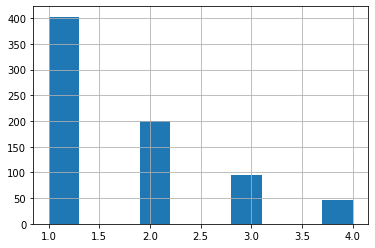

In [28]:
station_data['bike_category'].hist();

In [29]:
station_data['bike_category'].shape

(744,)

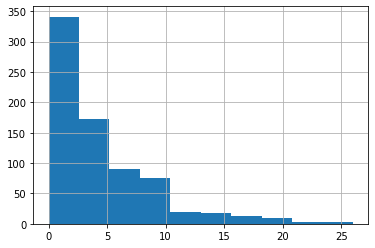

In [31]:
station_data['bikes'].hist();

0.0     119
1.0      95
2.0      58
3.0      50
6.0      46
4.0      44
5.0      42
7.0      28
8.0      28
9.0      22
10.0     12
11.0     11
15.0      6
13.0      5
20.0      5
14.0      4
16.0      4
17.0      3
12.0      3
19.0      3
24.0      2
22.0      2
18.0      2
26.0      1
Name: bikes, dtype: int64

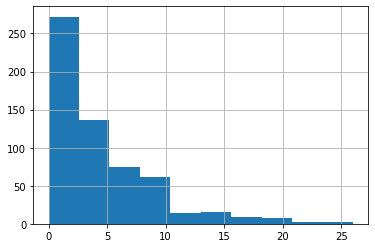

In [43]:
train, dev = strat_split_data(station_data)
train['bikes'].hist();
train['bikes'].value_counts()

1.0     27
2.0     21
0.0     21
4.0     14
3.0     12
5.0     10
7.0      8
6.0      8
8.0      6
12.0     4
10.0     4
9.0      3
11.0     2
16.0     2
17.0     2
14.0     2
23.0     1
19.0     1
20.0     1
Name: bikes, dtype: int64

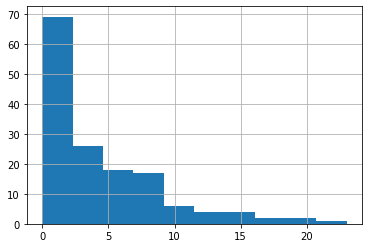

In [42]:
dev['bikes'].hist();
dev['bikes'].value_counts()

After we have used the 'bike_category', we should remove it from both the train and development sets as per the below code:

In [ ]:
for set_ in (train, dev):
    set_.drop("bike_category", axis=1, inplace=True)

Here, we are checking the dimensions of the train and development datasets are as expected (i.e. same dimensions are roughly 80:20).

In [50]:
print(train.shape, dev.shape)

(595, 25) (149, 25)


Now, we can check the distribution of our train and development datasets

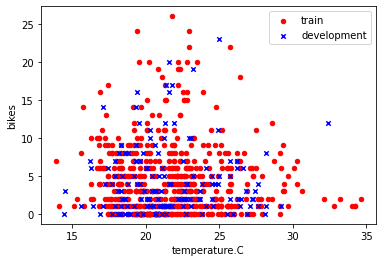

In [53]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
train.plot.scatter("temperature.C", "bikes", color="red", marker="o", ax=ax, label="train")
dev.plot.scatter("temperature.C", "bikes", color="blue", marker="x", ax=ax, label="development")
ax.legend();

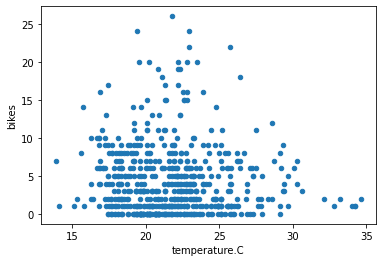

In [54]:
train.plot.scatter('temperature.C', 'bikes');

### Correlation - Practise Analysis 

In [55]:
corr = station_data.corr()

In [56]:
new_corr = corr.replace(1.0, np.nan)

In [57]:
new_corr['bikes'].sort_values(ascending=False)

bikes_3h_ago                   4.240492e-01
short_profile_bikes            3.970195e-01
full_profile_bikes             3.970195e-01
short_profile_3h_diff_bikes    2.096902e-01
full_profile_3h_diff_bikes     2.096902e-01
day                            1.305759e-01
timestamp                      1.301909e-01
airPressure.mb                 1.015576e-01
relHumidity.HR                 4.134018e-02
windMeanSpeed.m.s              1.954402e-02
windMaxSpeed.m.s               3.919557e-03
longitude                      1.299937e-15
latitude                      -2.982009e-16
hour                          -1.434241e-02
temperature.C                 -4.052000e-02
isHoliday                     -5.630410e-02
windDirection.grades          -8.767229e-02
weekhour                      -9.862673e-02
station                                 NaN
numDocks                                NaN
year                                    NaN
month                                   NaN
precipitation.l.m2              

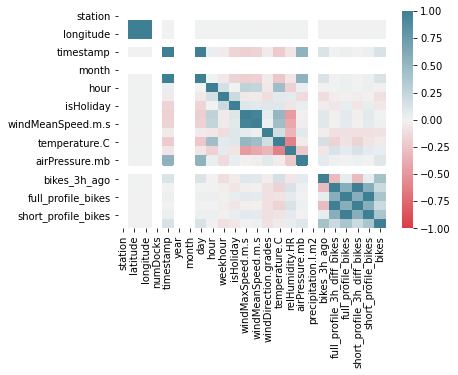

In [59]:
%matplotlib inline

import seaborn as sns

# We define a diverging colourmap so that 0.0 is white
cmap = sns.diverging_palette(10, 220, as_cmap=True)
sns.heatmap(corr, vmin=-1.0, vmax=1.0, cmap=cmap);

## Linear Regression - Practise Fitting Model

First, make a copy of the training data but drop all columns/features except the 'temperature.C' feature. This should produce a 1-dimensional training set, as below:

In [60]:
train_copy = train[['bikes_3h_ago']]
train_copy

,bikes_3h_ago
105,8.0
628,5.0
298,5.0
153,3.0
243,16.0
...,...
526,3.0
629,6.0
193,4.0
480,1.0


Next, lets check for any null values

In [61]:
def find_null(train_copy, feature):
    print('Null value: {boolean}\nNull value count: {count}'.format(
            boolean=train_copy[feature].isnull().values.any(),
            count=train_copy[feature].isnull().sum()))

In [62]:
find_null(train_copy, 'bikes_3h_ago')

Null value: True
Null value count: 2


In [63]:
train_copy['bikes_3h_ago']

105     8.0
628     5.0
298     5.0
153     3.0
243    16.0
       ... 
526     3.0
629     6.0
193     4.0
480     1.0
647     0.0
Name: bikes_3h_ago, Length: 595, dtype: float64

Let's train a simple imputer to take care of missing values (note: this could be the wrong thing to do, it may be that this data point may need to be removed...)

In [64]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(train_copy[['bikes_3h_ago']])
imputer.statistics_

array([3.])

In [65]:
X = imputer.transform(train_copy[['bikes_3h_ago']])
train_copy = pd.DataFrame(X, columns=train_copy.columns)

In [66]:
find_null(train_copy, 'bikes_3h_ago')

Null value: False
Null value count: 0


Yay! This seems to have worked...

Now, let's store our labels in a new dataframe

In [67]:
train_copy_labels = train[['bikes']].copy()
train_copy_labels

,bikes
105,4.0
628,6.0
298,7.0
153,20.0
243,4.0
...,...
526,1.0
629,6.0
193,1.0
480,2.0


In [68]:
find_null(train_copy_labels, 'bikes')

Null value: False
Null value count: 0


In [69]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="most_frequent")
imputer.fit(train_copy_labels[['bikes']])
imputer.statistics_

array([0.])

In [70]:
X = imputer.transform(train_copy_labels[['bikes']])
train_copy_labels = pd.DataFrame(X, columns=train_copy_labels.columns)

In [71]:
find_null(train_copy_labels, 'bikes')

Null value: False
Null value count: 0


Ok, now we have **_imputed_** the labels too and are ready to fit our model.

But first, let's check the shape of the training set and the labels have the same shape

In [72]:
assert(train_copy.shape == train_copy_labels.shape)

In [73]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(train_copy, train_copy_labels)

LinearRegression()

In [74]:
print(" Model gradient: ", reg.coef_[0])
print("Model intercept:", reg.intercept_)

 Model gradient:  [0.44871233]
Model intercept: [2.32657063]


In [75]:
reg.predict([[20]])

array([[11.30081726]])

Now, lets prepare the dev set so we can evaluate performance.

In [76]:
dev_copy = dev[['bikes_3h_ago']]
dev_copy

,bikes_3h_ago
590,2.0
467,10.0
330,2.0
18,2.0
327,5.0
...,...
711,4.0
391,0.0
680,1.0
550,0.0


In [77]:
find_null(dev_copy, 'bikes_3h_ago')

Null value: True
Null value count: 2


In [78]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="most_frequent")
imputer.fit(dev_copy[['bikes_3h_ago']])
imputer.statistics_

array([1.])

In [79]:
X = imputer.transform(dev_copy[['bikes_3h_ago']])
dev_copy = pd.DataFrame(X, columns=dev_copy.columns)

In [80]:
find_null(dev_copy, 'bikes_3h_ago')

Null value: False
Null value count: 0


In [81]:
dev_copy_labels = dev[['bikes']].copy()
dev_copy_labels

,bikes
590,1.0
467,10.0
330,4.0
18,10.0
327,2.0
...,...
711,2.0
391,7.0
680,14.0
550,1.0


In [82]:
find_null(dev_copy_labels, 'bikes')

Null value: False
Null value count: 0


In [83]:
preds = reg.predict(dev_copy)
ground_truth = dev_copy_labels['bikes']
print(ground_truth)

590     1.0
467    10.0
330     4.0
18     10.0
327     2.0
       ... 
711     2.0
391     7.0
680    14.0
550     1.0
63      0.0
Name: bikes, Length: 149, dtype: float64


The graph below shows the development training points (blue) and the predictions given by the classifier (red). Obviously not very good...

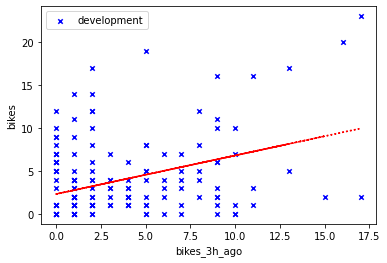

In [84]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

dev.plot.scatter("bikes_3h_ago", "bikes", color="blue", marker="x", ax=ax, label="development")
ax.plot(dev['bikes_3h_ago'], preds, linestyle=':', color='red')
ax.legend();

Lets visually compare our predictions and groud truths

In [85]:
dev_copy['bikes_3h_ago'][:10]

0     2.0
1    10.0
2     2.0
3     2.0
4     5.0
5     9.0
6     1.0
7     2.0
8    13.0
9     8.0
Name: bikes_3h_ago, dtype: float64

In [86]:
preds[:10]

array([[3.2239953 ],
       [6.81369395],
       [3.2239953 ],
       [3.2239953 ],
       [4.57013229],
       [6.36498162],
       [2.77528297],
       [3.2239953 ],
       [8.15983094],
       [5.91626929]])

In [87]:
ground_truth[:10]

590     1.0
467    10.0
330     4.0
18     10.0
327     2.0
643     1.0
534     0.0
675     0.0
635    17.0
471     2.0
Name: bikes, dtype: float64

In [88]:
from sklearn.metrics import mean_absolute_error
assert(len(ground_truth) == len(preds))
error = mean_absolute_error(ground_truth, preds)
error

3.401711018825415

Let's try manually putting in some of the predictions to ensure the results are consistent (slack testing, you'll need to be more rigorous than this going forward...)

In [89]:
reg.predict([[20.1]])

array([[11.3456885]])